In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [5]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [6]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [7]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


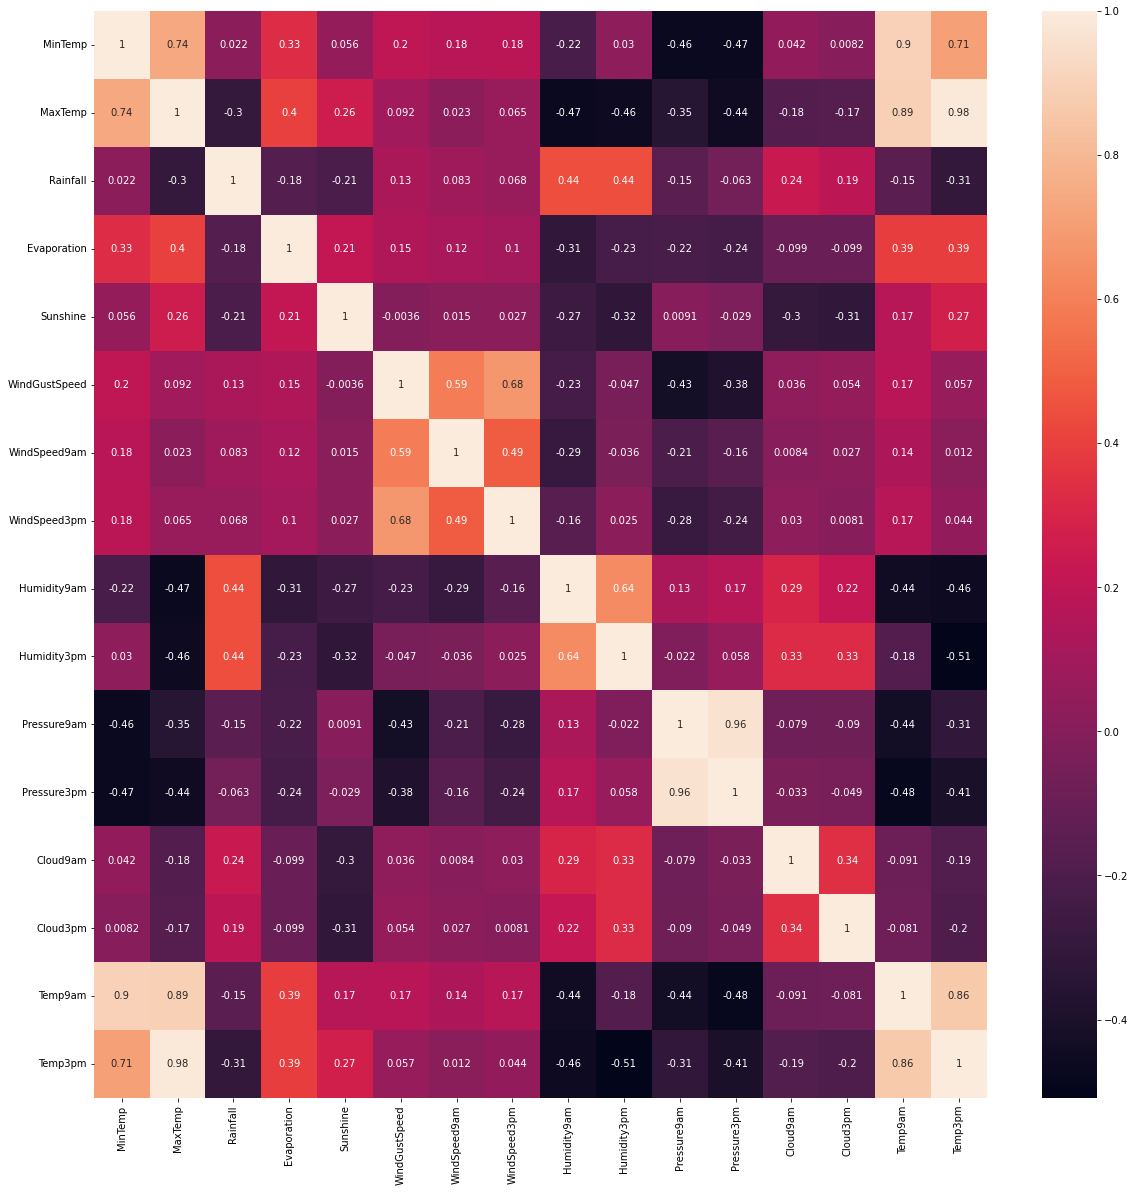

In [9]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


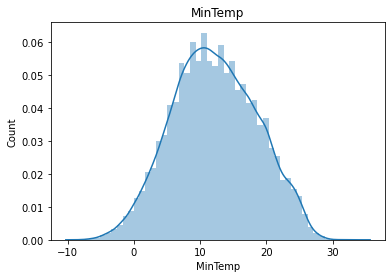

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


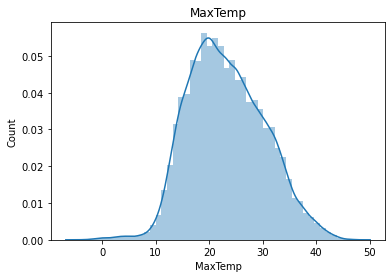

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


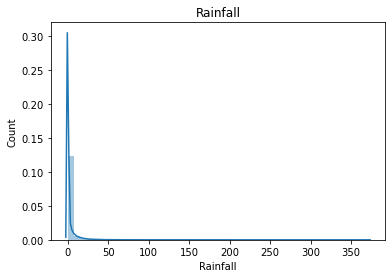

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


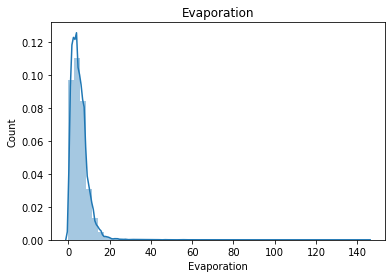

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


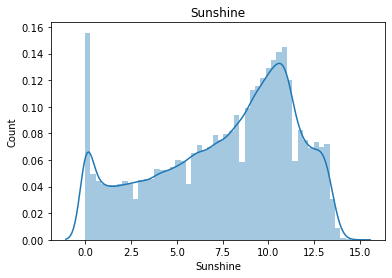

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


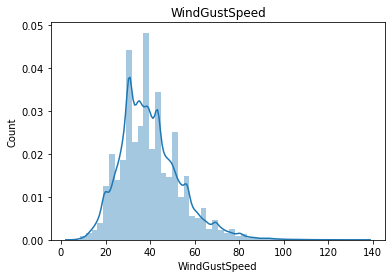

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


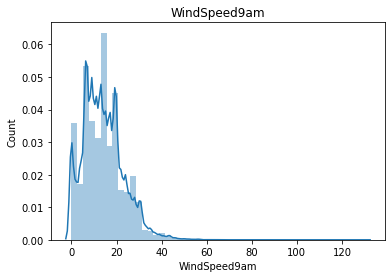

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


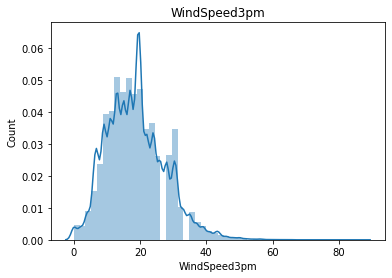

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


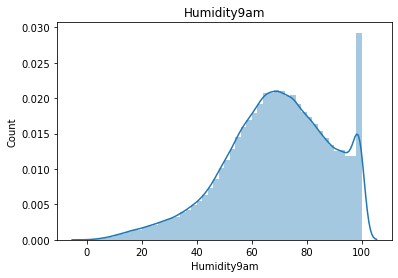

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


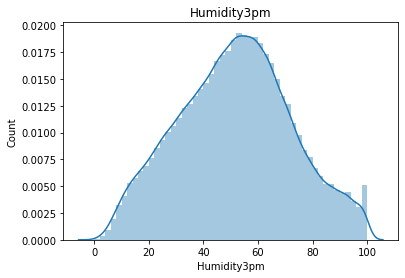

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


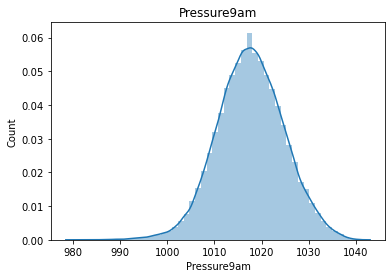

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


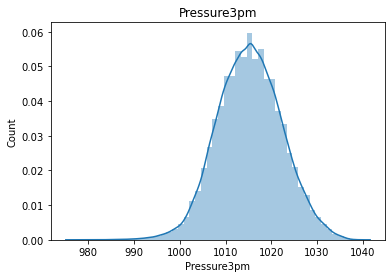

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


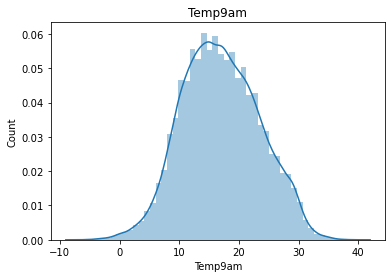

<Figure size 1080x1080 with 0 Axes>

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


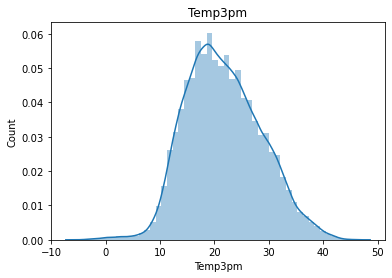

<Figure size 1080x1080 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

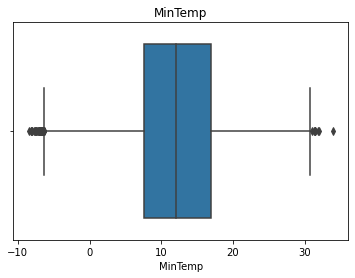

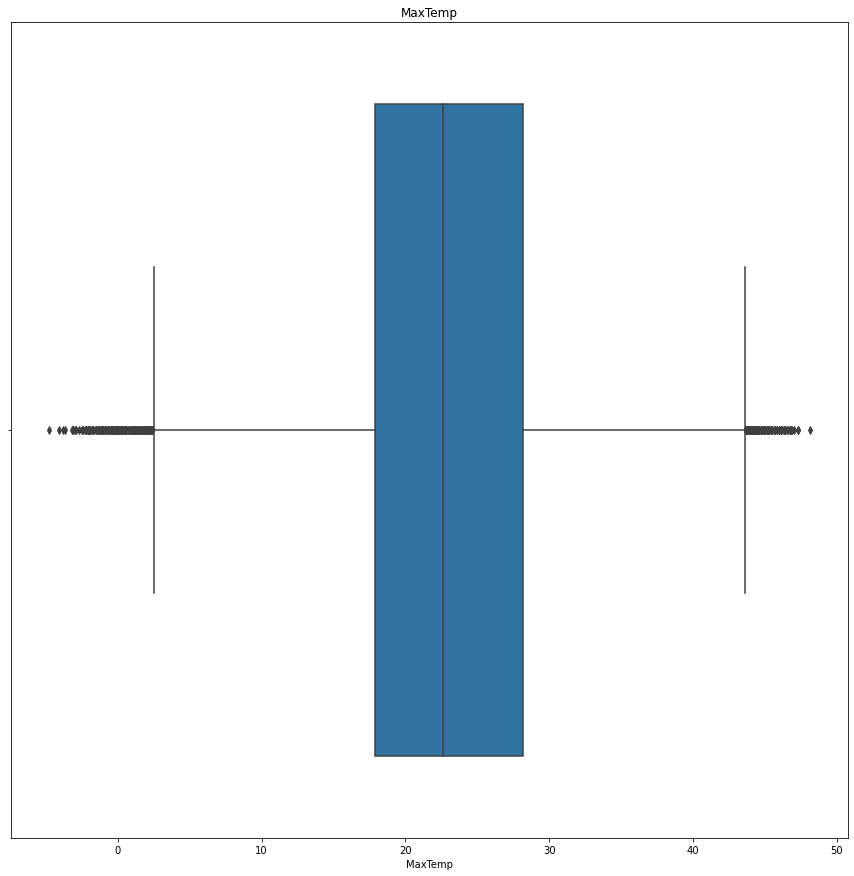

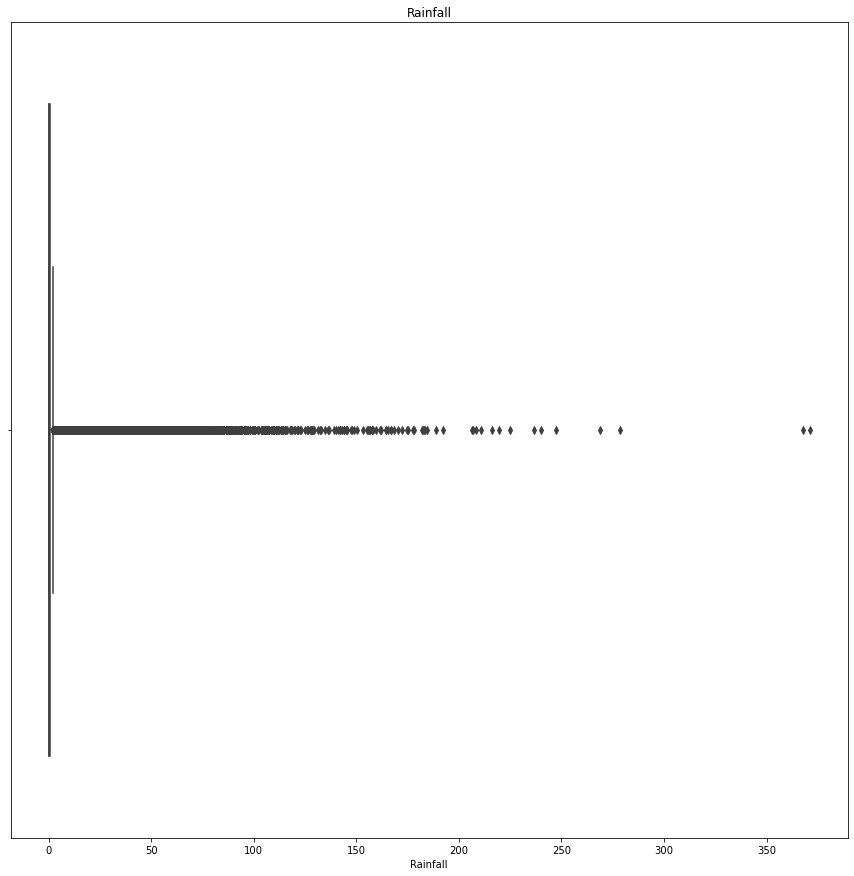

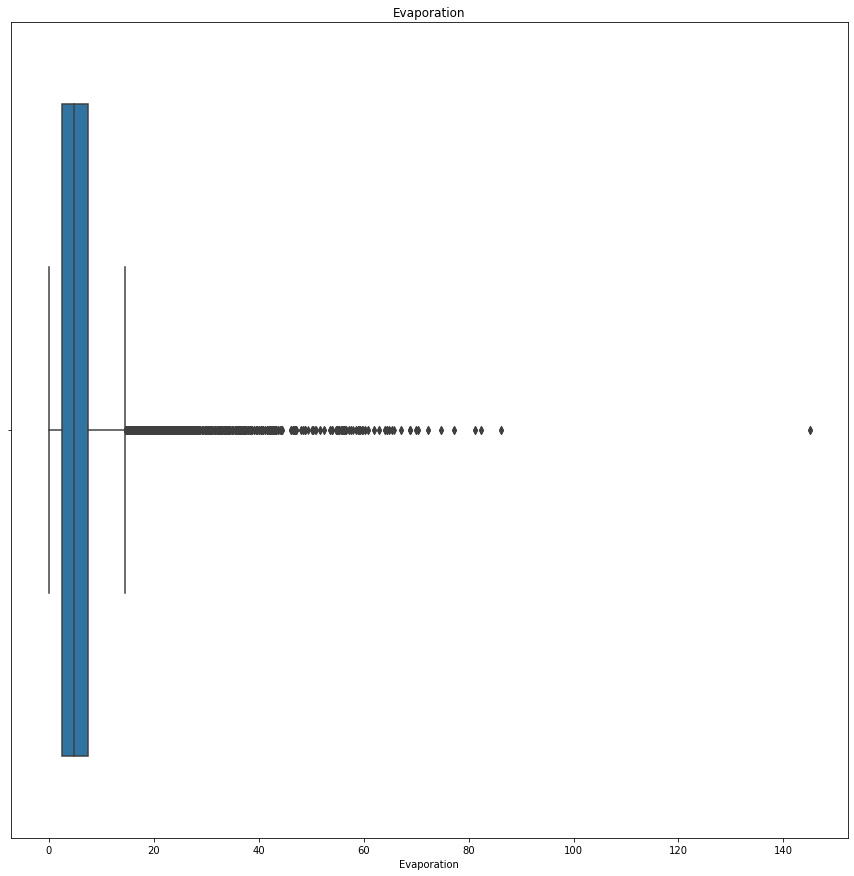

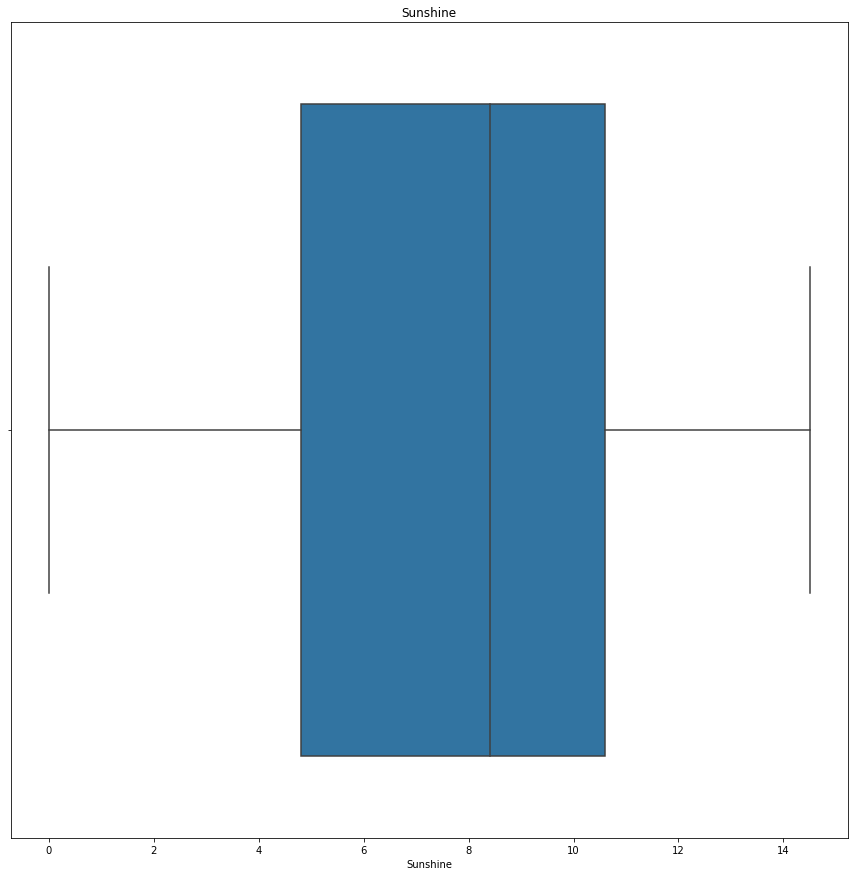

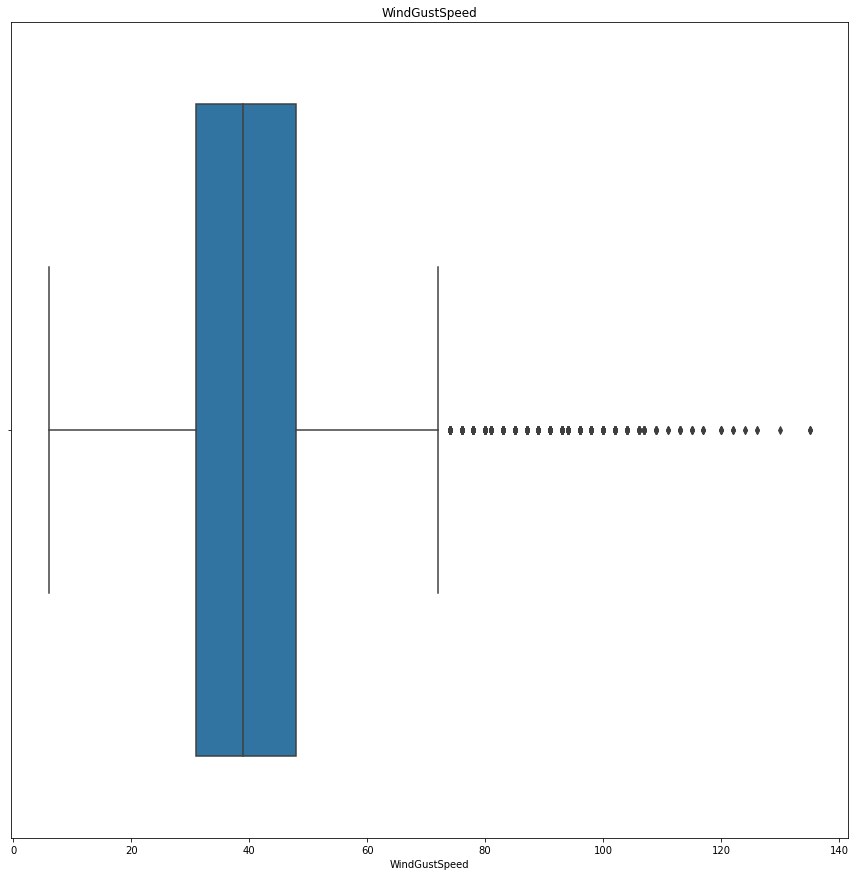

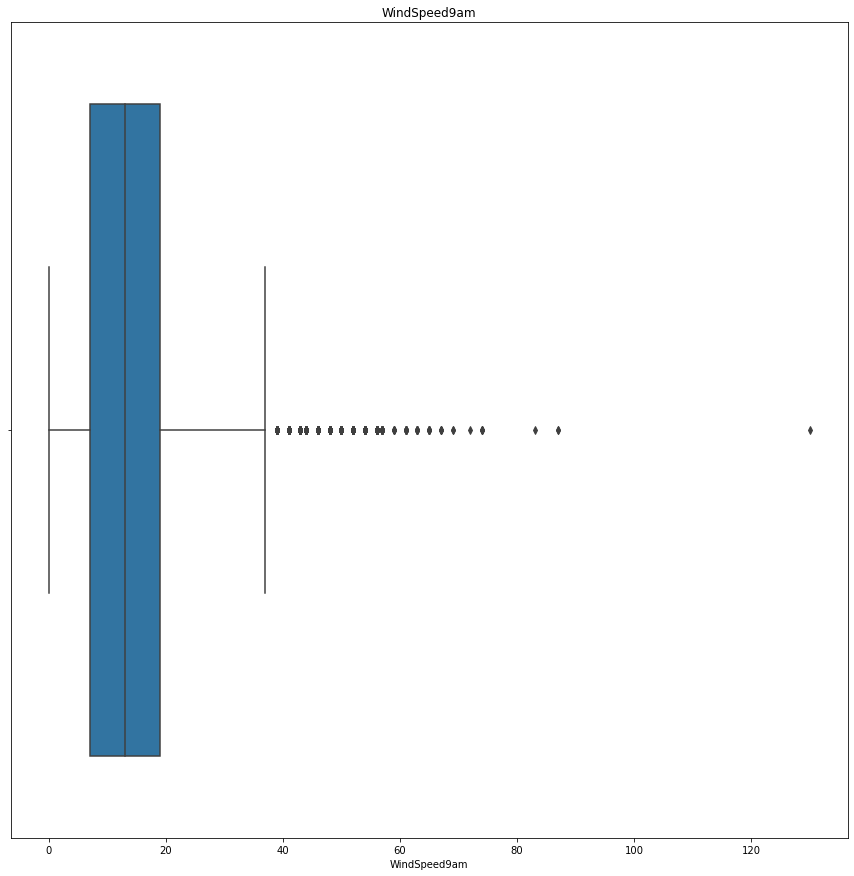

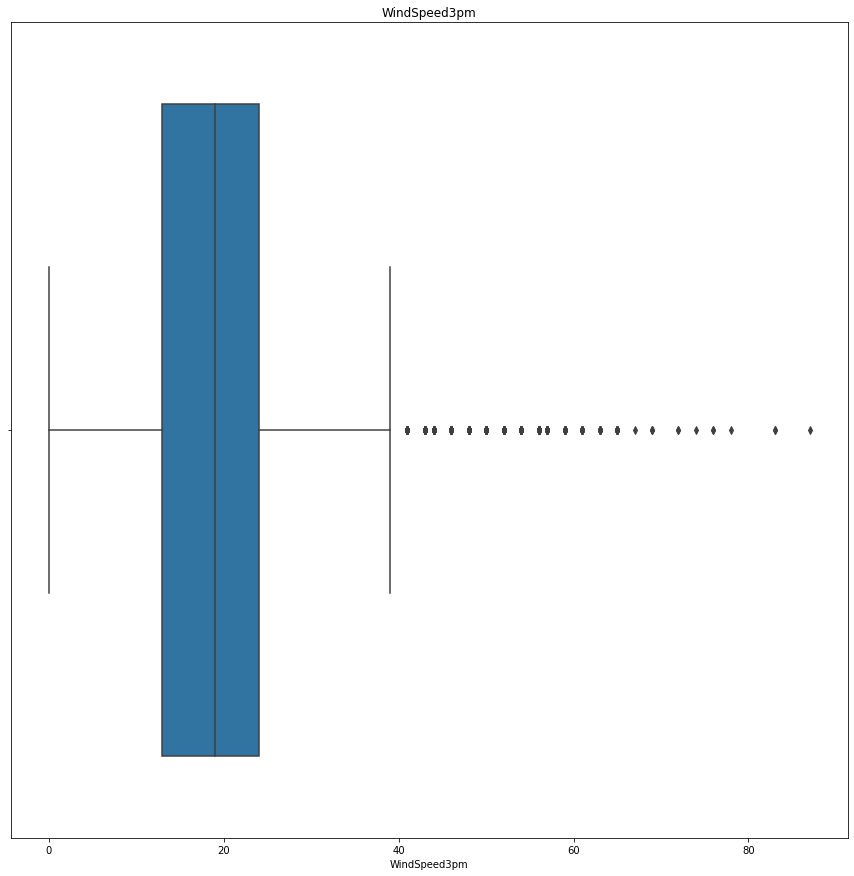

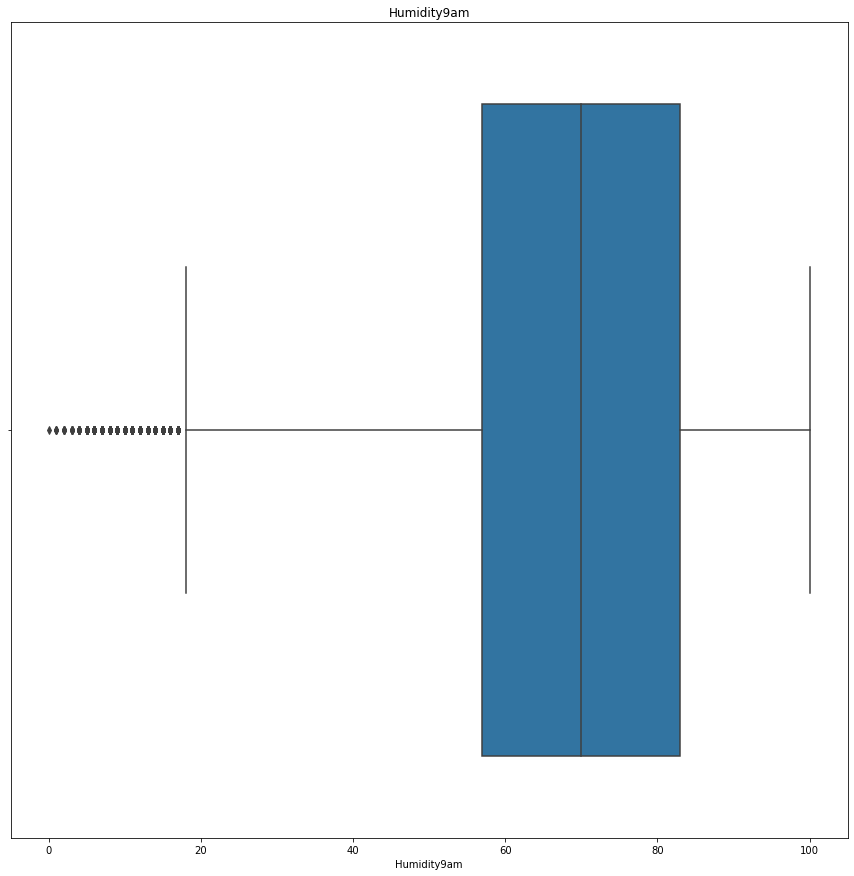

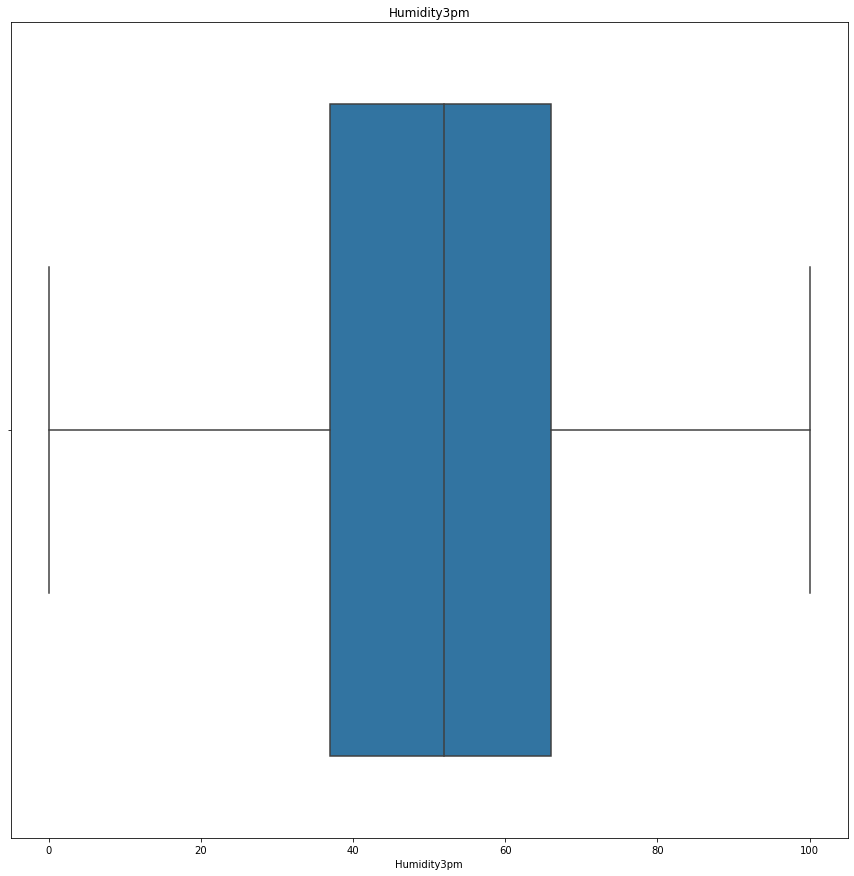

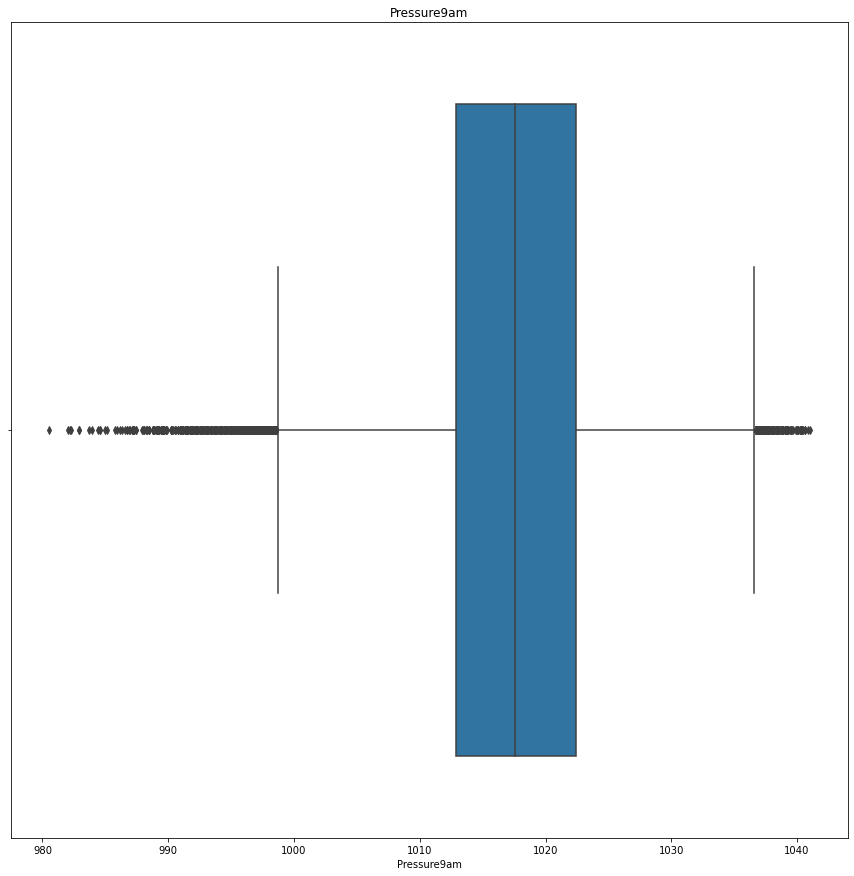

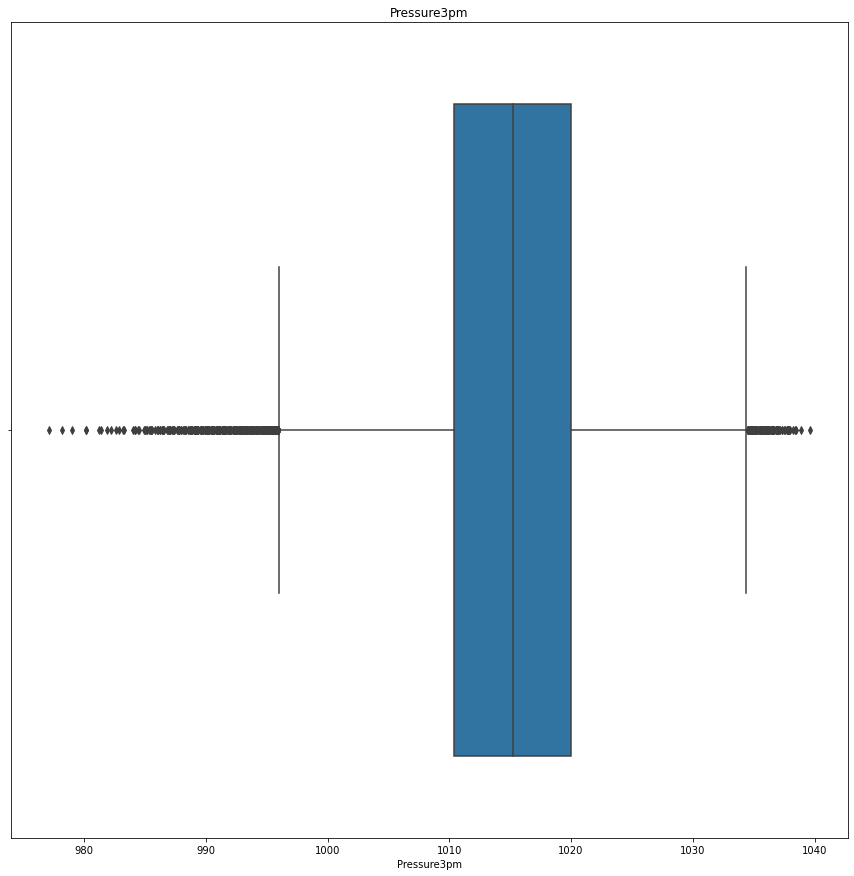

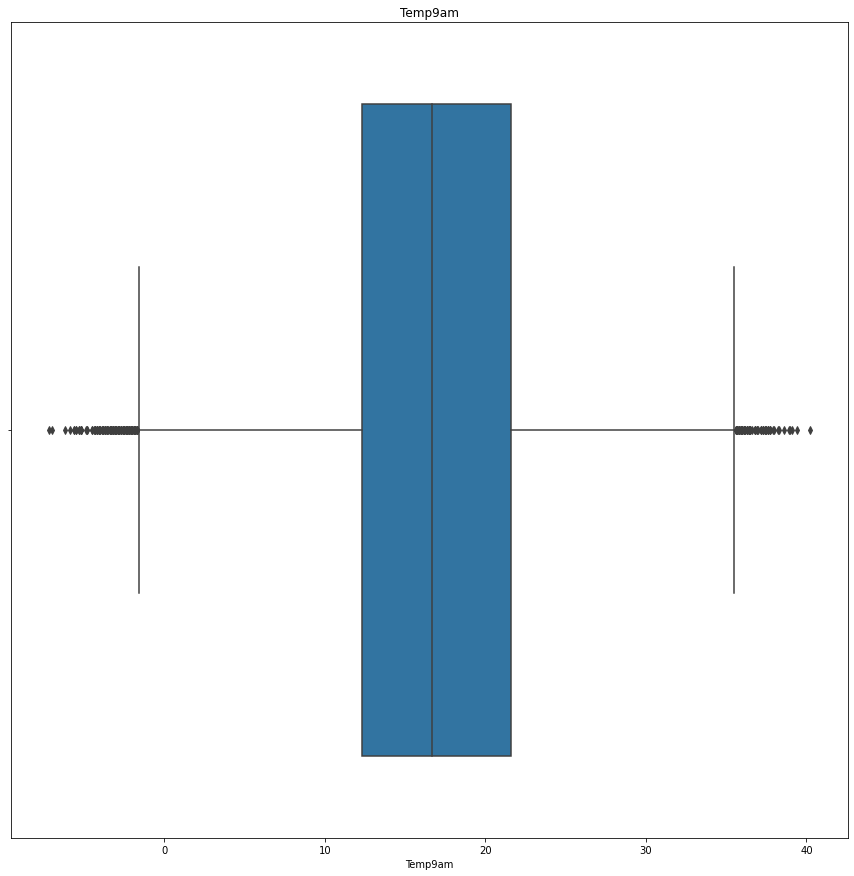

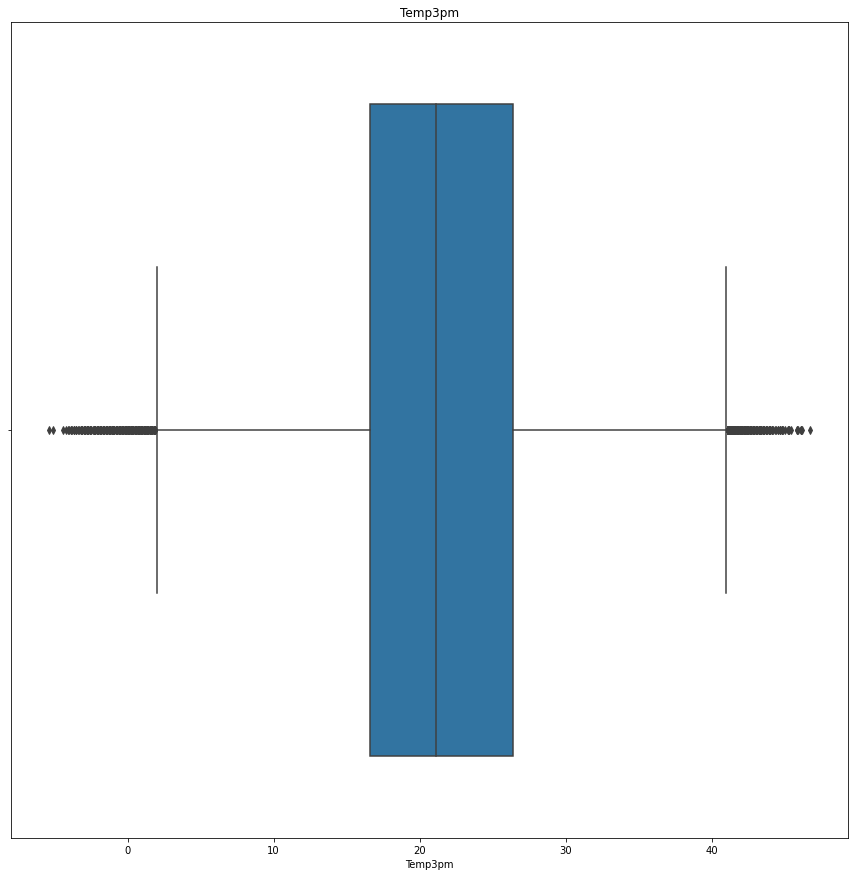

<Figure size 1080x1080 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [13]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [14]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [15]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [16]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [17]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [18]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [19]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [20]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [21]:
encoder = preprocessing.LabelEncoder() 
df['Location']= encoder.fit_transform(df['Location']) 

In [22]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [23]:
df["Date_year"] = df["Date"].dt.year
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [24]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,41,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,2017,6,21
145456,2017-06-22,41,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,2017,6,22
145457,2017-06-23,41,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,2017,6,23
145458,2017-06-24,41,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


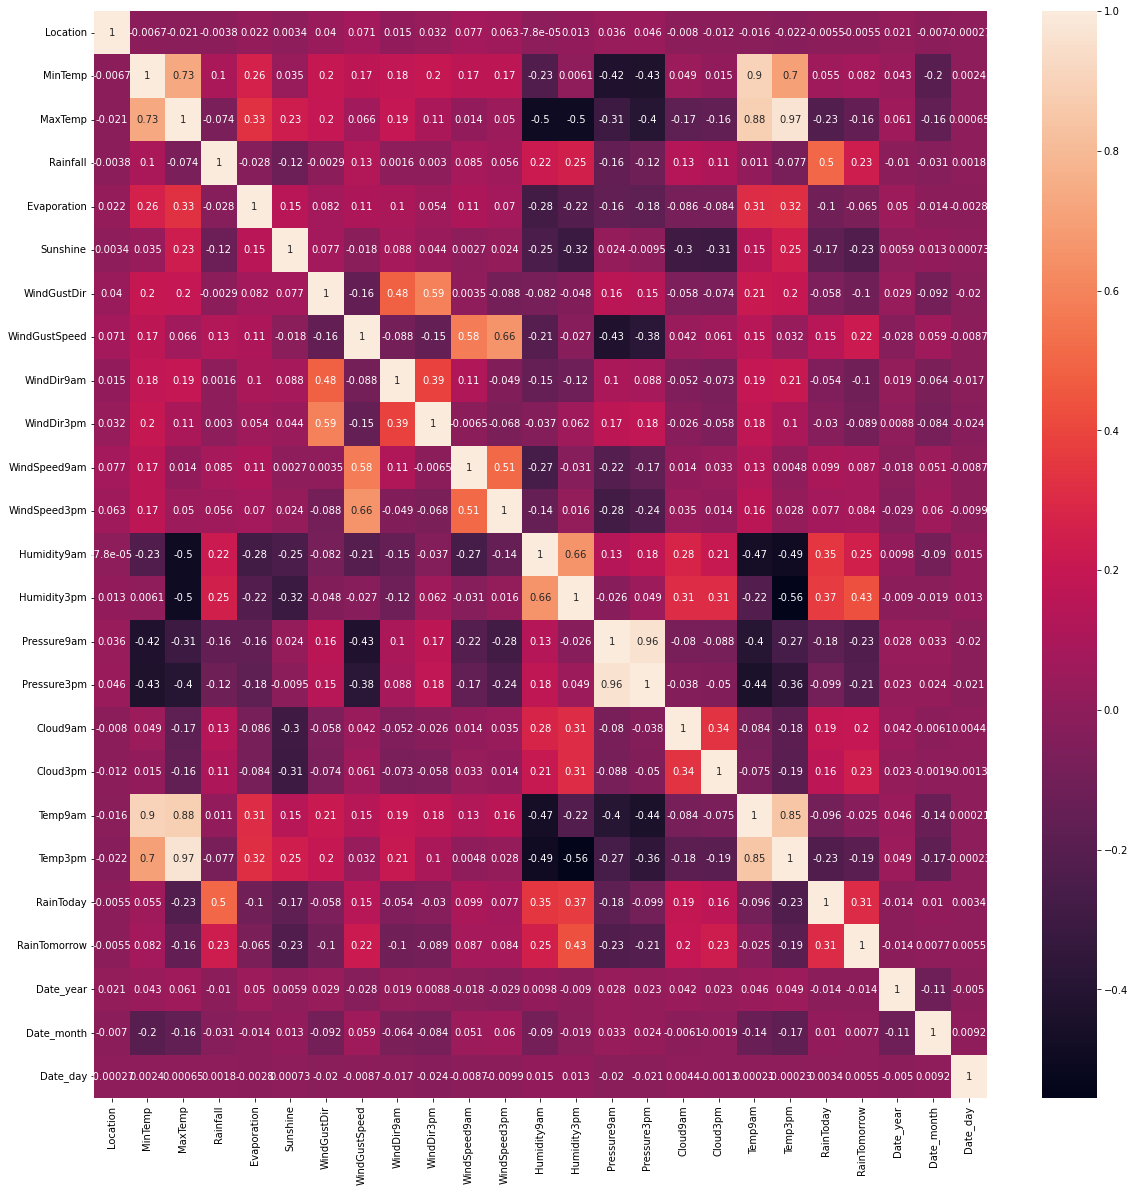

In [25]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

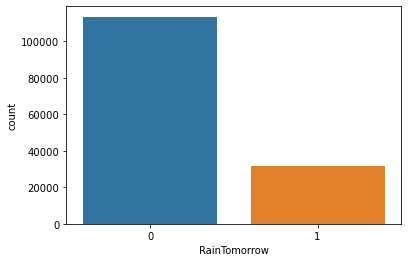

In [26]:
sns.countplot(df["RainTomorrow"])

In [27]:
df.to_csv("preprocessed.csv", index=False)

In [28]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, stratify = Y, random_state = 0)

In [31]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [32]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [33]:
!pip install catboost

Unable to create process using 'C:\Users\Himanshu Agrawal\anaconda3\python.exe "C:\Users\Himanshu Agrawal\anaconda3\Scripts\pip-script.py" install catboost'


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [35]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 223ms	remaining: 7m 25s
1:	total: 275ms	remaining: 4m 34s
2:	total: 329ms	remaining: 3m 39s
3:	total: 379ms	remaining: 3m 9s
4:	total: 438ms	remaining: 2m 54s
5:	total: 492ms	remaining: 2m 43s
6:	total: 546ms	remaining: 2m 35s
7:	total: 603ms	remaining: 2m 30s
8:	total: 656ms	remaining: 2m 25s
9:	total: 709ms	remaining: 2m 21s
10:	total: 764ms	remaining: 2m 18s
11:	total: 816ms	remaining: 2m 15s
12:	total: 866ms	remaining: 2m 12s
13:	total: 921ms	remaining: 2m 10s
14:	total: 971ms	remaining: 2m 8s
15:	total: 1.02s	remaining: 2m 7s
16:	total: 1.09s	remaining: 2m 6s
17:	total: 1.15s	remaining: 2m 6s
18:	total: 1.19s	remaining: 2m 4s
19:	total: 1.24s	remaining: 2m 3s
20:	total: 1.29s	remaining: 2m 1s
21:	total: 1.35s	remaining: 2m 1s
22:	total: 1.4s	remaining: 2m
23:	total: 1.45s	remaining: 1m 59s
24:	total: 1.5s	remaining: 1m 58s
25:	total: 1.56s	remaining: 1m 58s
26:	total: 1.61s	remaining: 1m 57s
27:	total: 1.66s	remaining: 1m 57s
28:	total: 1.72

231:	total: 12.2s	remaining: 1m 33s
232:	total: 12.3s	remaining: 1m 33s
233:	total: 12.3s	remaining: 1m 33s
234:	total: 12.4s	remaining: 1m 33s
235:	total: 12.4s	remaining: 1m 33s
236:	total: 12.5s	remaining: 1m 32s
237:	total: 12.5s	remaining: 1m 32s
238:	total: 12.6s	remaining: 1m 32s
239:	total: 12.7s	remaining: 1m 32s
240:	total: 12.7s	remaining: 1m 32s
241:	total: 12.8s	remaining: 1m 32s
242:	total: 12.8s	remaining: 1m 32s
243:	total: 12.9s	remaining: 1m 32s
244:	total: 12.9s	remaining: 1m 32s
245:	total: 13s	remaining: 1m 32s
246:	total: 13s	remaining: 1m 32s
247:	total: 13.1s	remaining: 1m 32s
248:	total: 13.1s	remaining: 1m 32s
249:	total: 13.2s	remaining: 1m 32s
250:	total: 13.2s	remaining: 1m 32s
251:	total: 13.3s	remaining: 1m 32s
252:	total: 13.3s	remaining: 1m 32s
253:	total: 13.4s	remaining: 1m 31s
254:	total: 13.4s	remaining: 1m 31s
255:	total: 13.5s	remaining: 1m 31s
256:	total: 13.5s	remaining: 1m 31s
257:	total: 13.6s	remaining: 1m 31s
258:	total: 13.6s	remaining: 1m 

463:	total: 24.1s	remaining: 1m 19s
464:	total: 24.1s	remaining: 1m 19s
465:	total: 24.2s	remaining: 1m 19s
466:	total: 24.2s	remaining: 1m 19s
467:	total: 24.3s	remaining: 1m 19s
468:	total: 24.3s	remaining: 1m 19s
469:	total: 24.4s	remaining: 1m 19s
470:	total: 24.4s	remaining: 1m 19s
471:	total: 24.5s	remaining: 1m 19s
472:	total: 24.5s	remaining: 1m 19s
473:	total: 24.6s	remaining: 1m 19s
474:	total: 24.7s	remaining: 1m 19s
475:	total: 24.7s	remaining: 1m 19s
476:	total: 24.8s	remaining: 1m 19s
477:	total: 24.8s	remaining: 1m 19s
478:	total: 24.9s	remaining: 1m 19s
479:	total: 25s	remaining: 1m 19s
480:	total: 25s	remaining: 1m 18s
481:	total: 25.1s	remaining: 1m 18s
482:	total: 25.1s	remaining: 1m 18s
483:	total: 25.2s	remaining: 1m 18s
484:	total: 25.2s	remaining: 1m 18s
485:	total: 25.3s	remaining: 1m 18s
486:	total: 25.3s	remaining: 1m 18s
487:	total: 25.4s	remaining: 1m 18s
488:	total: 25.4s	remaining: 1m 18s
489:	total: 25.5s	remaining: 1m 18s
490:	total: 25.5s	remaining: 1m 

698:	total: 35.3s	remaining: 1m 5s
699:	total: 35.4s	remaining: 1m 5s
700:	total: 35.4s	remaining: 1m 5s
701:	total: 35.4s	remaining: 1m 5s
702:	total: 35.5s	remaining: 1m 5s
703:	total: 35.5s	remaining: 1m 5s
704:	total: 35.6s	remaining: 1m 5s
705:	total: 35.6s	remaining: 1m 5s
706:	total: 35.7s	remaining: 1m 5s
707:	total: 35.7s	remaining: 1m 5s
708:	total: 35.7s	remaining: 1m 5s
709:	total: 35.8s	remaining: 1m 5s
710:	total: 35.8s	remaining: 1m 4s
711:	total: 35.9s	remaining: 1m 4s
712:	total: 35.9s	remaining: 1m 4s
713:	total: 36s	remaining: 1m 4s
714:	total: 36s	remaining: 1m 4s
715:	total: 36.1s	remaining: 1m 4s
716:	total: 36.1s	remaining: 1m 4s
717:	total: 36.1s	remaining: 1m 4s
718:	total: 36.2s	remaining: 1m 4s
719:	total: 36.2s	remaining: 1m 4s
720:	total: 36.3s	remaining: 1m 4s
721:	total: 36.3s	remaining: 1m 4s
722:	total: 36.4s	remaining: 1m 4s
723:	total: 36.4s	remaining: 1m 4s
724:	total: 36.5s	remaining: 1m 4s
725:	total: 36.6s	remaining: 1m 4s
726:	total: 36.6s	remain

936:	total: 48.3s	remaining: 54.8s
937:	total: 48.4s	remaining: 54.8s
938:	total: 48.4s	remaining: 54.7s
939:	total: 48.5s	remaining: 54.7s
940:	total: 48.5s	remaining: 54.6s
941:	total: 48.6s	remaining: 54.6s
942:	total: 48.6s	remaining: 54.5s
943:	total: 48.7s	remaining: 54.4s
944:	total: 48.7s	remaining: 54.4s
945:	total: 48.8s	remaining: 54.3s
946:	total: 48.8s	remaining: 54.3s
947:	total: 48.9s	remaining: 54.2s
948:	total: 48.9s	remaining: 54.2s
949:	total: 48.9s	remaining: 54.1s
950:	total: 49s	remaining: 54s
951:	total: 49s	remaining: 54s
952:	total: 49.1s	remaining: 53.9s
953:	total: 49.1s	remaining: 53.8s
954:	total: 49.2s	remaining: 53.8s
955:	total: 49.2s	remaining: 53.7s
956:	total: 49.2s	remaining: 53.7s
957:	total: 49.3s	remaining: 53.6s
958:	total: 49.3s	remaining: 53.5s
959:	total: 49.4s	remaining: 53.5s
960:	total: 49.4s	remaining: 53.4s
961:	total: 49.5s	remaining: 53.4s
962:	total: 49.5s	remaining: 53.3s
963:	total: 49.5s	remaining: 53.2s
964:	total: 49.6s	remaining:

1171:	total: 59.3s	remaining: 41.9s
1172:	total: 59.3s	remaining: 41.8s
1173:	total: 59.3s	remaining: 41.7s
1174:	total: 59.4s	remaining: 41.7s
1175:	total: 59.4s	remaining: 41.6s
1176:	total: 59.5s	remaining: 41.6s
1177:	total: 59.5s	remaining: 41.5s
1178:	total: 59.6s	remaining: 41.5s
1179:	total: 59.6s	remaining: 41.4s
1180:	total: 59.6s	remaining: 41.4s
1181:	total: 59.7s	remaining: 41.3s
1182:	total: 59.7s	remaining: 41.2s
1183:	total: 59.8s	remaining: 41.2s
1184:	total: 59.8s	remaining: 41.1s
1185:	total: 59.9s	remaining: 41.1s
1186:	total: 59.9s	remaining: 41s
1187:	total: 59.9s	remaining: 41s
1188:	total: 60s	remaining: 40.9s
1189:	total: 1m	remaining: 40.9s
1190:	total: 1m	remaining: 40.8s
1191:	total: 1m	remaining: 40.8s
1192:	total: 1m	remaining: 40.7s
1193:	total: 1m	remaining: 40.6s
1194:	total: 1m	remaining: 40.6s
1195:	total: 1m	remaining: 40.5s
1196:	total: 1m	remaining: 40.5s
1197:	total: 1m	remaining: 40.4s
1198:	total: 1m	remaining: 40.4s
1199:	total: 1m	remaining: 4

1405:	total: 1m 10s	remaining: 29.6s
1406:	total: 1m 10s	remaining: 29.6s
1407:	total: 1m 10s	remaining: 29.5s
1408:	total: 1m 10s	remaining: 29.5s
1409:	total: 1m 10s	remaining: 29.4s
1410:	total: 1m 10s	remaining: 29.4s
1411:	total: 1m 10s	remaining: 29.3s
1412:	total: 1m 10s	remaining: 29.3s
1413:	total: 1m 10s	remaining: 29.2s
1414:	total: 1m 10s	remaining: 29.2s
1415:	total: 1m 10s	remaining: 29.1s
1416:	total: 1m 10s	remaining: 29.1s
1417:	total: 1m 10s	remaining: 29s
1418:	total: 1m 10s	remaining: 29s
1419:	total: 1m 10s	remaining: 28.9s
1420:	total: 1m 10s	remaining: 28.9s
1421:	total: 1m 10s	remaining: 28.8s
1422:	total: 1m 10s	remaining: 28.8s
1423:	total: 1m 11s	remaining: 28.7s
1424:	total: 1m 11s	remaining: 28.7s
1425:	total: 1m 11s	remaining: 28.6s
1426:	total: 1m 11s	remaining: 28.6s
1427:	total: 1m 11s	remaining: 28.5s
1428:	total: 1m 11s	remaining: 28.5s
1429:	total: 1m 11s	remaining: 28.4s
1430:	total: 1m 11s	remaining: 28.4s
1431:	total: 1m 11s	remaining: 28.3s
1432:

1630:	total: 1m 21s	remaining: 18.5s
1631:	total: 1m 21s	remaining: 18.4s
1632:	total: 1m 21s	remaining: 18.4s
1633:	total: 1m 21s	remaining: 18.3s
1634:	total: 1m 21s	remaining: 18.3s
1635:	total: 1m 21s	remaining: 18.2s
1636:	total: 1m 21s	remaining: 18.2s
1637:	total: 1m 22s	remaining: 18.1s
1638:	total: 1m 22s	remaining: 18.1s
1639:	total: 1m 22s	remaining: 18s
1640:	total: 1m 22s	remaining: 18s
1641:	total: 1m 22s	remaining: 17.9s
1642:	total: 1m 22s	remaining: 17.9s
1643:	total: 1m 22s	remaining: 17.8s
1644:	total: 1m 22s	remaining: 17.8s
1645:	total: 1m 22s	remaining: 17.7s
1646:	total: 1m 22s	remaining: 17.7s
1647:	total: 1m 22s	remaining: 17.6s
1648:	total: 1m 22s	remaining: 17.6s
1649:	total: 1m 22s	remaining: 17.5s
1650:	total: 1m 22s	remaining: 17.5s
1651:	total: 1m 22s	remaining: 17.4s
1652:	total: 1m 22s	remaining: 17.4s
1653:	total: 1m 22s	remaining: 17.3s
1654:	total: 1m 22s	remaining: 17.3s
1655:	total: 1m 22s	remaining: 17.2s
1656:	total: 1m 22s	remaining: 17.2s
1657:

1853:	total: 1m 32s	remaining: 7.28s
1854:	total: 1m 32s	remaining: 7.23s
1855:	total: 1m 32s	remaining: 7.18s
1856:	total: 1m 32s	remaining: 7.13s
1857:	total: 1m 32s	remaining: 7.08s
1858:	total: 1m 32s	remaining: 7.03s
1859:	total: 1m 32s	remaining: 6.98s
1860:	total: 1m 32s	remaining: 6.93s
1861:	total: 1m 32s	remaining: 6.88s
1862:	total: 1m 32s	remaining: 6.83s
1863:	total: 1m 32s	remaining: 6.78s
1864:	total: 1m 32s	remaining: 6.73s
1865:	total: 1m 33s	remaining: 6.68s
1866:	total: 1m 33s	remaining: 6.63s
1867:	total: 1m 33s	remaining: 6.58s
1868:	total: 1m 33s	remaining: 6.53s
1869:	total: 1m 33s	remaining: 6.48s
1870:	total: 1m 33s	remaining: 6.43s
1871:	total: 1m 33s	remaining: 6.38s
1872:	total: 1m 33s	remaining: 6.33s
1873:	total: 1m 33s	remaining: 6.28s
1874:	total: 1m 33s	remaining: 6.23s
1875:	total: 1m 33s	remaining: 6.18s
1876:	total: 1m 33s	remaining: 6.13s
1877:	total: 1m 33s	remaining: 6.08s
1878:	total: 1m 33s	remaining: 6.03s
1879:	total: 1m 33s	remaining: 5.98s
1

In [36]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21533  1184]
 [ 2783  3592]]
0.8636394885191805
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7556657111759614

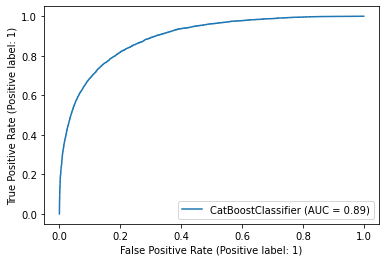

In [37]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [38]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [39]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20593  2124]
 [ 2415  3960]]
0.8439777258352812
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     22717
           1       0.65      0.62      0.64      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7638391046870832

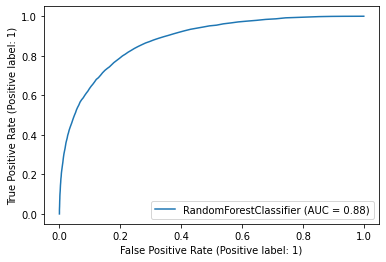

In [40]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [42]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17889  4828]
 [ 1514  4861]]
0.7820019249278152
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22717
           1       0.50      0.76      0.61      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.73     29092
weighted avg       0.83      0.78      0.80     29092



C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7749908706186176

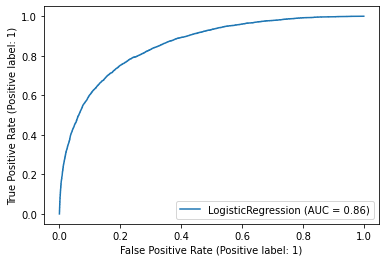

In [43]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [45]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [46]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[18272  4445]
 [ 2020  4355]]
0.7777739584765572
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     22717
           1       0.49      0.68      0.57      6375

    accuracy                           0.78     29092
   macro avg       0.70      0.74      0.71     29092
weighted avg       0.81      0.78      0.79     29092



C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7437344063830577

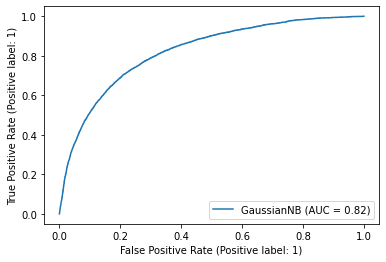

In [47]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [48]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17197  5520]
 [ 1840  4535]]
0.7470094871442321
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     22717
           1       0.45      0.71      0.55      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.73      0.69     29092
weighted avg       0.80      0.75      0.76     29092



C:\Users\Himanshu Agrawal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7341913588079066

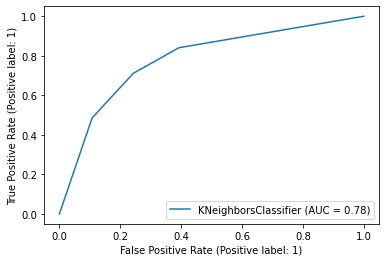

In [50]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [51]:
svc = SVC()

In [ ]:
svc.fit(X_train_res, y_train_res)

In [ ]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

In [ ]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

In [ ]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

In [ ]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [ ]:
import joblib
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")